In [59]:
# import libraries possible needed
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [60]:
# import dataset
spotify_data = pd.read_csv('Spotify Music Data.csv')
spotify_data

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


#### Training MLR

In [61]:
# split the data into training and test
np.random.seed(2)
train = spotify_data.sample(round(spotify_data.shape[0]*0.8)) 
test = spotify_data.drop(train.index)

## Training MLR

In [62]:
ols_object = smf.ols(formula = "pop~bpm+nrgy+dnce+dB+live+val+dur+acous+spch", data = train)
mlr_spotify = ols_object.fit()
mlr_spotify.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.330
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           0.000582
Time:                        10:56:41   Log-Likelihood:                -1939.4
No. Observations:                 482   AIC:                             3899.
Df Residuals:                     472   BIC:                             3941.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.6152      9.599      9.232      0.000      69.754     107.477
bpm            0.0154      0.026      0.595      0.552      -0.036       0.066
nrgy          -0.1556      0.062     -2.526      0.012      -0.277      -0.035
dnce           0.0981      0.059      1.674      0.095      -0.017       0.213
dB             1.0384      0.486      2.138      0.033       0.084       1.993
live          -0.0999      0.050     -1.997      0.046      -0.198      -0.002
val           -0.0292      0.037     -0.793      0.428      -0.102       0.043
dur           -0.0352      0.019     -1.852      0.065      -0.073       0.002
acous         -0.0372      0.039     -0.958      0.339      -0.113       0.039
spch          -0.1734      0.093     -1.864      0.063      -0.356       0.009
==============================================================================
Omnibus:                      131.199   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              345.179
Skew:                          -1.335   Prob(JB):                     1.11e-75
Kurtosis:                       6.171   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**equation:** pop = 88.6152 + .0154(bpm) + (-.1556)(nrgy) + .0981(dnce) + 1.0384(dB) + (-.0999)(live) + (-.0292)(val) + (-.0352)(dur) + (-.0372)(acous) + (-.1734)(spch)

The R^2 value for this MLR is only 6%, which is very low. This suggests that using all of variables other than pop as predictor variables is not the best way to predict pop. Therefore, we will use a combination of 3 techniques to alter this regression model to hopefully increase the R^2: 
1) using less variables/only variables that matter

2) transformations & interactions

### 1) Using less variables/only variables that matter/different variables

After viewing the MLR with all of the variables, we can see that some predictor variables are much more insignificant than others by viewing the p-value associated with them (P>|t|). I will first take out all of the predictor variables that are insignificant at the .1 level (have a p-value higher than .1).

##### a) remove all predictors insignificant at the .1 level by looking at original MLR (no bpm, nrgy, val, & acous)

In [37]:
ols_object1 = smf.ols(formula = "pop~dnce+dB+live+dur+spch", data = train)
mlr_spotify1 = ols_object1.fit()
mlr_spotify1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     4.231
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           0.000898
Time:                        10:29:07   Log-Likelihood:                -1943.7
No. Observations:                 482   AIC:                             3899.
Df Residuals:                     476   BIC:                             3925.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.9056      6.042     12.232      0.000      62.033      85.778
dnce           0.0744      0.049      1.520      0.129      -0.022       0.171
dB             0.1837      0.376      0.488      0.626      -0.556       0.923
live          -0.1181      0.049     -2.391      0.017      -0.215      -0.021
dur           -0.0304      0.019     -1.619      0.106      -0.067       0.006
spch          -0.2208      0.091     -2.439      0.015      -0.399      -0.043
==============================================================================
Omnibus:                      118.956   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.213
Skew:                          -1.261   Prob(JB):                     3.86e-61
Kurtosis:                       5.738   Cond. No.                     2.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

explain. This unfortunately decreased the R^2 from 6% to 4.3%. Most likely a result of the idea that the R^2 value always increases when you add predictors, so removing them lessens the R^2 value.

##### b) do F-test and then remove all proven insignificant predictors from original MLR

In [45]:
train.f_test('(age = 0), (lbph = 0), (lcp = 0), (gleason = 0), (pgg45 = 0)')

AttributeError: 'DataFrame' object has no attribute 'f_test'

In [38]:
ols_object2 = smf.ols(formula = "?", data = train)
mlr_spotify2 = ols_object2.fit()
mlr_spotify2.summary()

PatsyError: error tokenizing input (maybe an unclosed string?)
    ?
    ^

##### c) MLR with a qualitative predictor (genre)

In [42]:
ols_object3 = smf.ols(formula = "pop~dur+genre", data = train)
mlr_spotify3 = ols_object3.fit()
mlr_spotify3.summary()

PatsyError: Error evaluating factor: NameError: name 'genre' is not defined
    pop~dur+genre
            ^^^^^

### 2) Transformations and Interactions

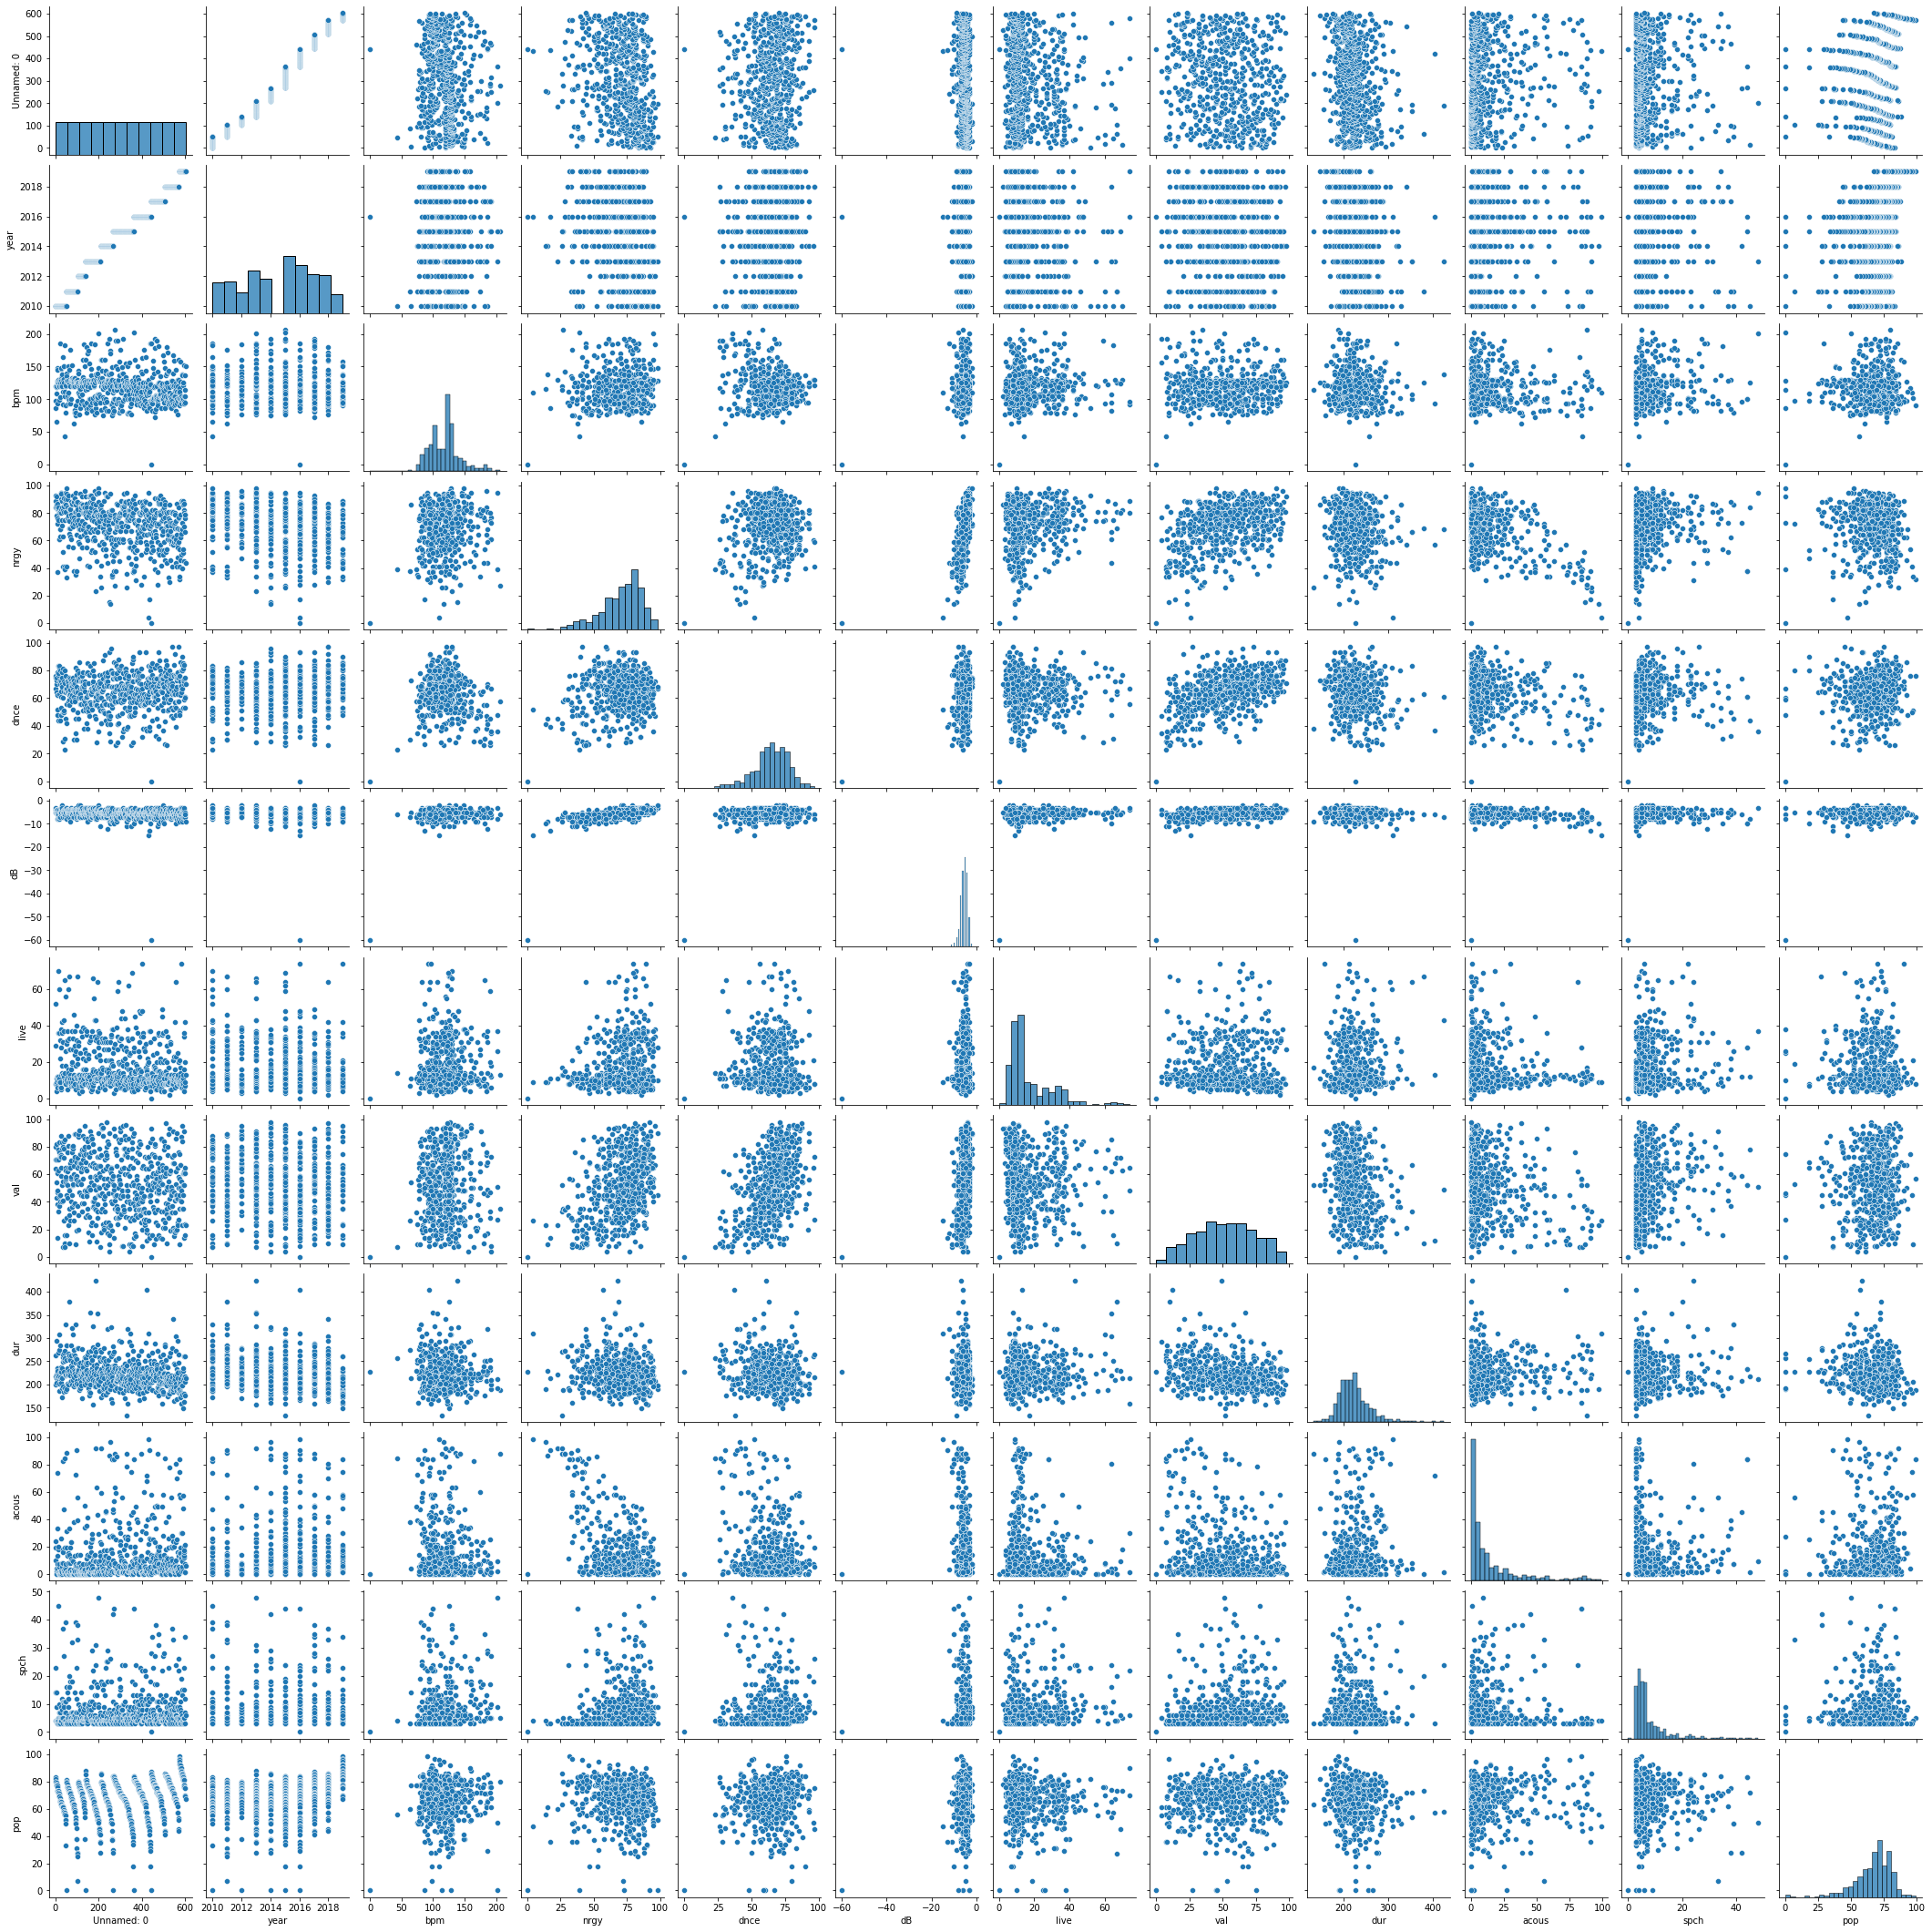

In [50]:
# visualizing the data
sns.pairplot(spotify_data)

In [46]:
# finding the correlation between 
spotify_data.corrwith(spotify_data.pop)

AttributeError: 'function' object has no attribute '_get_numeric_data'

TypeError: float() argument must be a string or a number, not 'method'

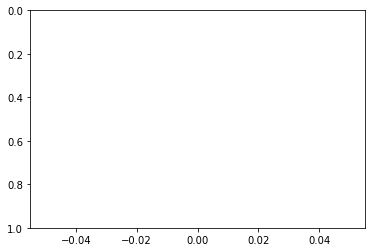

In [58]:
## since correlation not working, assuming that dur is the most correlated with pop by pairplot
## if find out it is different, change dur to best predictors w/ highest correlation
sns.scatterplot(x = spotify_data.dur, y = spotify_data.pop)

In [57]:
## if nonlinear, do
ols_object_4 = smf.ols(formula = 'pop~dur+I(dur**2)+I(dur**3)', data = spotify_data)
mlr_spotify4 = ols_object_4.fit()
mlr_spotify4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.252
Date:                Fri, 24 Feb 2023   Prob (F-statistic):             0.0812
Time:                        10:55:26   Log-Likelihood:                -2465.0
No. Observations:                 603   AIC:                             4938.
Df Residuals:                     599   BIC:                             4956.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.8789     54.564      1.042      0.298     -50.282     164.040
dur             0.1951      0.642      0.304      0.761      -1.066       1.456
I(dur ** 2)    -0.0009      0.002     -0.384      0.701      -0.006       0.004
I(dur ** 3)  1.196e-06   3.04e-06      0.393      0.695   -4.78e-06    7.18e-06
==============================================================================
Omnibus:                      180.473   Durbin-Watson:                   0.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              537.203
Skew:                          -1.445   Prob(JB):                    2.23e-117
Kurtosis:                       6.610   Cond. No.                     1.29e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
## compare it with normal SLR
ols_object_5 = smf.ols(formula = 'pop~dur', data = spotify_data)
mlr_spotify5 = ols_object_5.fit()
mlr_spotify5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     6.618
Date:                Fri, 24 Feb 2023   Prob (F-statistic):             0.0103
Time:                        10:55:13   Log-Likelihood:                -2465.1
No. Observations:                 603   AIC:                             4934.
Df Residuals:                     601   BIC:                             4943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.4946      3.921     19.507      0.000      68.793      84.196
dur           -0.0444      0.017     -2.573      0.010      -0.078      -0.011
==============================================================================
Omnibus:                      180.575   Durbin-Watson:                   0.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              537.208
Skew:                          -1.446   Prob(JB):                    2.22e-117
Kurtosis:                       6.608   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
ols_object = smf.ols(formula = 'pop~bpm+nrgy+dnce+dB+live+val+dur+acous+spch', data = spotify_data)
mlr_spotify = ols_object.fit()
mlr_spotify.summary()

### Model significance
Is the overall regression significant at 5% level?

The overall regression is significant at the 5% level because the f-statistic is 9 * 10^-07, which is less than 0.05. This means that changes in popularity correlate with shifts in the predictor variables.

### Coefficient interpretation
Interpret the coefficient of every variable.

The coefficient for bpm is 0.0056. This means that there is a 0.0056 increase in bpm for every unit increase in popularity. 

The coefficient for nrgy is -0.1978. This means that there is a -0.1978 increase in nrgy for every unit increase in popularity. 

The coefficient for dnce is 0.0827. This means that there is a 0.0827 increase in dnce for every unit increase in popularity. 

The coefficient for dB is 1.2858. This means that there is a 1.2858 increase in dB for every unit increase in popularity. 

The coefficient for live is -0.0515. This means that there is a -0.0515 increase in live for every unit increase in popularity. 

The coefficient for val is -0.0056. This means that there is a -0.0056 increase in val for every unit increase in popularity. 

The coefficient for dur is -0.0389. This means that there is a -0.0389 increase in dur for every unit increase in popularity. 

The coefficient for acous is -0.0210. This means that there is a -0.0210 increase in acous for every unit increase in popularity. 

The coefficient for spch is -0.0057. This means that there is a -0.0057 increase in spch for every unit increase in popularity. 


The coefficient for bpm is 0.819. This variable is not statistically significant because its p-value is higher than 0.05.

The coefficient for nrgy is 0.000. This variable is statically significant because its p-value is lower than 0.05.

The coefficient for dnce is 0.118. This variable is not statistically significant because its p-value is higher than 0.05.

The coefficient for dB is 0.000. This variable is statically significant because its p-value is lower than 0.05.


The coefficient for live is 0.257. This variable is not statistically significant because its p-value is higher than 0.05.

The coefficient for val is 0.865. This variable is not statistically significant because its p-value is higher than 0.05.

The coefficient for dur is 0.028. This variable is statically significant because its p-value is lower than 0.05.


The coefficient for acous is 0.550. This variable is not statistically significant because its p-value is higher than 0.05.

The coefficient for spch is 0.942. This variable is not statistically significant because its p-value is higher than 0.05.



### Variable significance
Report the $p$-values for all the predictor variables.